# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DataSet

In [2]:
db_data = pd.read_csv("OPENDATA_BOOKING_CARSHARING.csv", sep=';', header=0)
db_data[548069:]

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
548069,46385327,100001,149218,B45F2CFD95C5887698AD87B6596102E24DCCE243,2017-05-16 07:15:07,2017-05-16 07:15:00,2017-05-16 08:15:00,Nein,Ja,NaN,Sredzkistraße,402667,Sredzkistraße,402667,Station,Berlin,Flinkster iPhone
548070,46385351,100001,174116,954FB74EF255E4089D3D7DA3FE6234DE781BFDD3,2017-05-16 07:16:29,2017-05-16 08:30:00,2017-05-16 12:30:00,Nein,Nein,NaN,Bf Köln Messe/Deutz,400755,Bf Köln Messe/Deutz,400755,Station,Köln,Internet
548071,46385778,100001,173552,A986BBFA0F81DD3D2EB02A97A30A97CF111BD2C1,2017-05-16 07:37:19,2017-05-16 08:45:00,2017-05-18 09:45:00,Nein,Nein,NaN,Hbf Saarbrücken,400280,Hbf Saarbrücken,400280,Station,Saarbrücken,Internet
548072,46385814,100012,169106,1127C45D5E5C398FE0BCAF07D6C6694C2C9E0B0B,2017-05-16 07:39:22,2017-05-16 07:45:00,2017-05-16 10:45:00,Nein,Nein,NaN,Hbf Gelsenkirchen,406277,Hbf Gelsenkirchen,406277,Station,Gelsenkirchen,Internet


In [3]:
columns = ['START_RENTAL_ZONE','START_RENTAL_ZONE_HAL_ID','END_RENTAL_ZONE','END_RENTAL_ZONE_HAL_ID','RENTAL_ZONE_HAL_SRC'] 
db_data.drop(columns, inplace=True, axis=1)

In [4]:
db_data['TECHNICAL_INCOME_CHANNEL'].fillna('UNKNOWN', inplace=True)

In [5]:
db_data = db_data[db_data.TECHNICAL_INCOME_CHANNEL != 'UNKNOWN']

In [6]:
db_data['DISTANCE'].fillna('UNKNOWN', inplace=True)

In [7]:
db_data = db_data[db_data.DISTANCE != 'UNKNOWN']

In [8]:
db_data.isnull().sum()

BOOKING_HAL_ID               0
CATEGORY_HAL_ID              0
VEHICLE_HAL_ID               0
CUSTOMER_HAL_ID              0
DATE_BOOKING                 0
DATE_FROM                    0
DATE_UNTIL                   0
COMPUTE_EXTRA_BOOKING_FEE    0
TRAVERSE_USE                 0
DISTANCE                     0
CITY_RENTAL_ZONE             0
TECHNICAL_INCOME_CHANNEL     0
dtype: int64

In [9]:
db_data.apply(lambda x: len(x.unique()))

BOOKING_HAL_ID               495924
CATEGORY_HAL_ID                  44
VEHICLE_HAL_ID                 1778
CUSTOMER_HAL_ID               52669
DATE_BOOKING                 494142
DATE_FROM                     93781
DATE_UNTIL                   102837
COMPUTE_EXTRA_BOOKING_FEE         2
TRAVERSE_USE                      2
DISTANCE                       1833
CITY_RENTAL_ZONE                 85
TECHNICAL_INCOME_CHANNEL         38
dtype: int64

In [10]:
cartype = pd.read_csv("OPENDATA_VEHICLE_CARSHARING.csv", sep=';', header=0)
columns = ['VEHICLE_MODEL_TYPE','VEHICLE_MODEL_NAME','VEHICLE_TYPE_NAME','VIN','REGISTRATION_PLATE','SERIAL_NUMBER','KW','OWNERSHIP_TYPE','CAPACITY_AMOUNT', 'ACCESS_CONTROL_COMPONENT_TYPE', 'COMPANY', 'COMPANY_GROUP'] 
cartype.drop(columns, inplace=True, axis=1)
cartype.head()
carmerge = pd.merge(db_data, cartype, on ='VEHICLE_HAL_ID', how='inner')
carmerge.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14,Köln,Internet,Citroën,Diesel
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0,Köln,Internet,Citroën,Diesel
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17,Köln,Internet,Citroën,Diesel
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16,Köln,Internet,Citroën,Diesel
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16,Köln,Internet,Citroën,Diesel


In [11]:
carmerge['FUEL_TYPE_NAME'].value_counts(dropna=False)

Diesel                     389636
Super (Benzin)              64373
Strom                       25838
Super E10                   12235
Plug In (Strom, Super)       2390
Erdgas (Nottank: Super)        56
Name: FUEL_TYPE_NAME, dtype: int64

In [12]:
catgtype = pd.read_csv("OPENDATA_CATEGORY_CARSHARING.csv", sep=';', header=0)
columns = ['COMPANY','COMPANY_GROUP']
catgtype.drop(columns, inplace=True, axis=1)
catgtype = catgtype.rename(columns={'HAL_ID':'CATEGORY_HAL_ID'})
data = pd.merge(carmerge, catgtype, on ='CATEGORY_HAL_ID', how='inner')
catgtype.head()

,CATEGORY_HAL_ID,CATEGORY
0,100000,Werbeklasse (mit Beklebung)
1,100001,Kleinklasse (teilweise ohne Navi)
2,100002,Mini (teilweise ohne Navi)
3,100003,Kompaktklasse
4,100004,Zubehör


In [13]:
data.isnull().sum()

BOOKING_HAL_ID               0
CATEGORY_HAL_ID              0
VEHICLE_HAL_ID               0
CUSTOMER_HAL_ID              0
DATE_BOOKING                 0
DATE_FROM                    0
DATE_UNTIL                   0
COMPUTE_EXTRA_BOOKING_FEE    0
TRAVERSE_USE                 0
DISTANCE                     0
CITY_RENTAL_ZONE             0
TECHNICAL_INCOME_CHANNEL     0
VEHICLE_MANUFACTURER_NAME    0
FUEL_TYPE_NAME               0
CATEGORY                     0
dtype: int64

In [14]:
data.describe()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID
count,4.926130e+05,492613.000000,492613.000000
mean,3.189740e+07,100005.580364,158787.639991
std,7.214651e+06,5.062214,7748.562174
min,1.784220e+07,100001.000000,143031.000000
25%,2.604031e+07,100001.000000,151335.000000
50%,3.063278e+07,100003.000000,156811.000000
75%,3.720466e+07,100012.000000,163397.000000
max,4.638445e+07,100015.000000,181564.000000


In [15]:
#data.groupby('CUSTOMER_HAL_ID')['BOOKING_HAL_ID'].apply(np.unique)

In [45]:
#data.pivot_table(columns='CUSTOMER_HAL_ID')

In [47]:
#data['START_RENTAL_ZONE'].value_counts()

In [49]:
#db_data['RENTAL_ZONE_HAL_SRC'].value_counts()

In [123]:
#db_data.applymap(lambda x: not x or pd.isnull(x)).sum()

In [35]:
"""dist = db_data['DISTANCE'].plot(legend=True)
dist.set_xlabel('no of bookings')
dist.set_ylabel('distance traveled')"""

"dist = db_data['DISTANCE'].plot(legend=True)\ndist.set_xlabel('no of bookings')\ndist.set_ylabel('distance traveled')"

In [213]:
#db_data[['RENTAL_ZONE_HAL_SRC', 'DISTANCE']].plot()

In [16]:
data['TECHNICAL_INCOME_CHANNEL'].value_counts(dropna=False)

Internet                       322139
Flinkster iPhone               101180
Flinkster Android               52153
ICS-Server                       3175
Flinkster Windows                2185
Multicity iPhone                 1967
Broker HAL                       1851
Multicity Android                1406
BwFPS Portal Web                 1172
BwCarsharing iPhone               870
Bahn_de_2                         811
HALAPI Teilauto                   731
BwCarsharing Android              647
Book-n-Drive iPhone               544
Onesto_Bahn                       336
API                               236
Book-n-Drive Android              228
ford2go iPhone                    147
ford2go Android                   144
Scouter 255 Web Praegnanz         133
Scouter 255 iOS 2Denker           121
teilAuto                          120
Ford Carsharing FordPass           61
Scouter 255 Android 2Denker        53
Flinkster Connect                  45
BwFPS Dispo Testzugang             42
Stuttgart Se

In [7]:
#db_data.iloc[:,6:].plot()
#plt.show()
#db_data.isnull().sum()

In [8]:
#db_data[db_data.DISTANCE.isnull()].sort_index()
#0 and NaN vales?

In [9]:
#db_data[db_data['DISTANCE']==0].sort_index()
#db_data.loc[db_data['DISTANCE'].isnull()].sum()


In [10]:
#db_data[db_data.TECHNICAL_INCOME_CHANNEL.isnull()].sort_index()
#what shold we do with this null values

In [11]:
#db_data.dropna(how='all', inplace = True)
#db_data[548069:]

In [9]:
#nonull = db_data[db_data.TECHNICAL_INCOME_CHANNEL != 'UNKNOWN']
#nonull.head()

In [17]:
data.shape

(492613, 15)

In [18]:
db_data.dropna(how='any').shape

(495924, 12)

In [19]:
data.dropna(subset=['DISTANCE','TECHNICAL_INCOME_CHANNEL' ], how='any').shape

(492613, 15)

In [20]:
db_data.shape

(495924, 12)

# Converting to datetime type

In [21]:
data['DATE_BOOKING'] = pd.to_datetime(data.DATE_BOOKING)
data['DATE_FROM'] = pd.to_datetime(data.DATE_FROM)
data['DATE_UNTIL'] = pd.to_datetime(data.DATE_UNTIL)

In [16]:
data.dtypes

BOOKING_HAL_ID                        int64
CATEGORY_HAL_ID                       int64
VEHICLE_HAL_ID                        int64
CUSTOMER_HAL_ID                      object
DATE_BOOKING                 datetime64[ns]
DATE_FROM                    datetime64[ns]
DATE_UNTIL                   datetime64[ns]
COMPUTE_EXTRA_BOOKING_FEE            object
TRAVERSE_USE                         object
DISTANCE                             object
CITY_RENTAL_ZONE                     object
TECHNICAL_INCOME_CHANNEL             object
VEHICLE_MANUFACTURER_NAME            object
FUEL_TYPE_NAME                       object
CATEGORY                             object
dtype: object

In [17]:
data.DATE_BOOKING.max()

Timestamp('2017-05-16 05:01:56')

In [18]:
#for booking date
data['BOOKING_YEAR']= data.DATE_BOOKING.dt.year
data['BOOKING_MONTH']= data.DATE_BOOKING.dt.month
data['BOOKING_WDAY']= data.DATE_BOOKING.dt.weekday

In [19]:
data['FROM_MONTH']= data.DATE_FROM.dt.month

In [20]:
data['UNTIL_MONTH']= data.DATE_UNTIL.dt.month

In [21]:
data['FROM_WDAY']= data.DATE_FROM.dt.weekday

In [22]:
data['UNTIL_WDAY']= data.DATE_UNTIL.dt.weekday

In [23]:
data.BOOKING_YEAR.value_counts().sort_index()

2013       897
2014    169872
2015    152722
2016    127674
2017     41448
Name: BOOKING_YEAR, dtype: int64

In [24]:
data.DATE_BOOKING.min()

Timestamp('2013-06-05 08:49:33')

In [25]:
data.DATE_FROM.min()

Timestamp('2014-01-01 00:30:00')

In [27]:
data.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME,CATEGORY,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2013,6,2,1,1,6,6
1,19923967,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-09-15 12:19:14,2014-01-05 14:00:00,2014-01-05 15:30:00,Nein,Nein,0,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2013,9,6,1,1,6,6
2,20453330,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-10-19 13:25:38,2014-03-16 18:15:00,2014-03-16 19:30:00,Nein,Nein,17,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2013,10,5,3,3,6,6
3,20799835,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:10:26,2014-01-06 17:00:00,2014-01-06 23:45:00,Nein,Nein,16,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2013,11,6,1,1,0,0
4,20799864,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:13:25,2014-01-13 17:00:00,2014-01-13 23:45:00,Nein,Nein,16,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2013,11,6,1,1,0,0


In [71]:
data.CITY_RENTAL_ZONE.value_counts()

Berlin                    142583
Köln                       87147
München                    81568
Stuttgart                  33258
Hamburg                    17395
Frankfurt am Main          15708
Mannheim                    8997
Freiburg                    8333
Hannover                    7396
Duisburg                    7228
Karlsruhe                   6019
Essen                       4622
Siegburg                    4200
Ulm                         3436
Aschaffenburg               2877
Saarbrücken                 2818
Heidelberg                  2808
Münster                     2801
Potsdam                     2729
Fulda                       2616
Troisdorf                   2532
Düsseldorf                  2532
Ingolstadt                  2212
Bielefeld                   2191
Offenburg                   2159
Aachen                      2110
Kiel                        2079
Lübeck                      1922
Heilbronn                   1876
Schwerin                    1837
          

In [82]:
#db_data[17:22].plot(subplots=True, figsize=(16, 18));

In [83]:
one_tenth = db_data.sample(frac = .1, random_state=np.random.randint(10))

In [84]:
one_tenth.shape

(49592, 19)

In [85]:
one_tenth = one_tenth.sort_values(by=['DATE_BOOKING'], ascending=[True])

In [86]:
one_tenth.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
7,19508250,100006,156308,0E40E3CA959C55D8040775695FD9A3033201298B,2013-08-23 00:14:48,2014-05-24 15:00:00,2014-05-25 01:30:00,Nein,Nein,176,Hamburg,Internet,2013,8,4,5,5,5,6
23,20350059,100012,151335,7A74D1CF5B58FE0253A4CFC9424C7AB96233C816,2013-10-12 18:22:59,2014-01-03 20:30:00,2014-01-06 16:15:00,Nein,Ja,42,Flugh. Berlin,Internet,2013,10,5,1,1,4,0
48,20761695,100012,150336,3FCEED3132998BAF8810A8B46DA3E7DA4871135F,2013-11-07 16:37:55,2014-01-09 10:30:00,2014-01-09 14:15:00,Nein,Nein,137,Köln,Internet,2013,11,3,1,1,3,3
51,20782444,150010,150048,C55C654F93FF5FE615B1B4F256F6842BE479A7C8,2013-11-08 20:45:49,2014-01-11 09:15:00,2014-01-11 11:15:00,Nein,Nein,23,Köln,Internet,2013,11,4,1,1,5,5
54,20799880,100012,150359,D564D3A1EA8BF096581556520B8F6582BEB65EFD,2013-11-10 14:14:54,2014-01-20 17:00:00,2014-01-20 23:45:00,Nein,Nein,15,Köln,Internet,2013,11,6,1,1,0,0


In [87]:
#from pd.plotting import autocorrelation_plot

#autocorrelation_plot(db_data['DATE_BOOKING', 'DISTANCE'])

In [88]:
#one_tenth[[4,5,6,9,17,18,19,20,21]].plot(subplots=True, figsize=(16, 18));

In [89]:
#sns.pairplot(db_data["Distance"], kind = "reg");

In [90]:
#g = sns.PairGrid(db_data, vars=["DISTANCE", "BOOKING_MONTH"], hue=["CITY_RENTAL_ZONE"])
#g.map(plt.scatter);

In [91]:
#plt.scatter(db_data['BOOKING_MONTH'], db_data['BOOKING_YEAR'])
#plt.show()

In [92]:
#db_data.groupby(['BOOKING_WDAY', 'BOOKING_MONTH'])['DISTANCE'].mean().plot()


In [93]:
"""for title, group in db_data.groupby('BOOKING_YEAR'):
    group.plot(x='BOOKING_MONTH', y='BOOKING_WDAY', title=title, subplots=True
)"""

"for title, group in db_data.groupby('BOOKING_YEAR'):\n    group.plot(x='BOOKING_MONTH', y='BOOKING_WDAY', title=title, subplots=True\n)"

In [72]:
#db_data['TECHNICAL_INCOME_CHANNEL'].value_counts(dropna=False)

In [73]:
#db_data['DISTANCE'].fillna(db_data['DISTANCE'].mean, inplace=True)

In [74]:
#db_data[db_data.DISTANCE.isnull()].sort_index()

In [75]:
booking_by_city = data.pivot_table(index='CITY_RENTAL_ZONE', values='BOOKING_YEAR', aggfunc='count')
booking_by_city

,BOOKING_YEAR
CITY_RENTAL_ZONE,
Aachen,2110
Aschaffenburg,2877
Augsburg,1694
Bayreuth,130
Berlin,142583
Bielefeld,2191
Bietigheim-Bissingen,497
Cottbus,601
Deggenhausertal,894


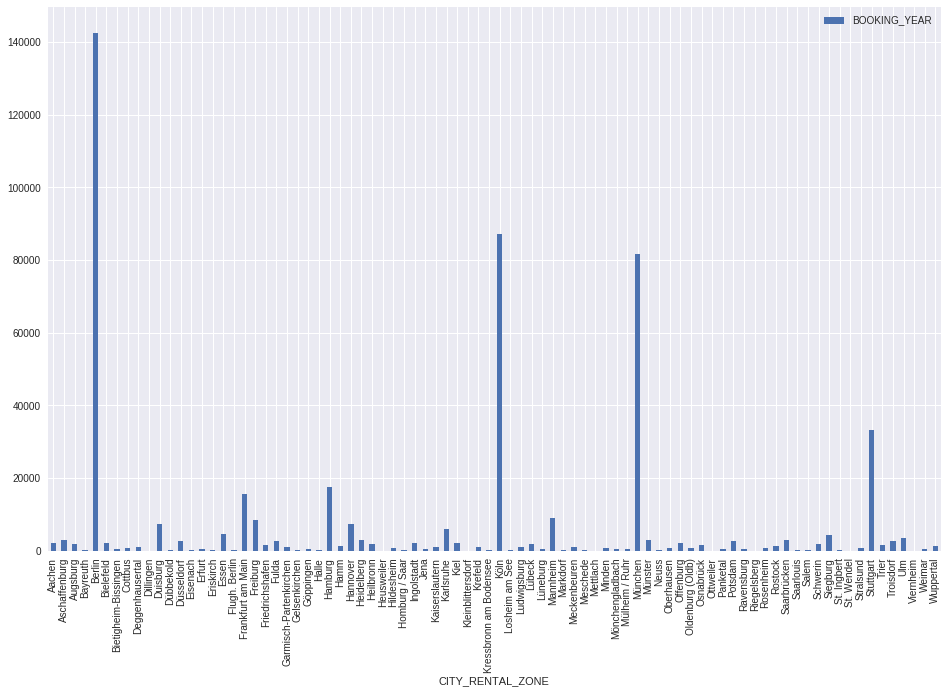

In [76]:
booking_by_city.plot(kind='bar', figsize=[16,10], stacked=True)

In [239]:
#db_data[17:22].plot(subplots=True, figsize=(16, 18))

In [77]:
booking_by_channel = data.pivot_table(index=['TECHNICAL_INCOME_CHANNEL', 'CITY_RENTAL_ZONE'], values='BOOKING_YEAR', aggfunc='count')
booking_by_channel

BOOKING_YEAR
TECHNICAL_INCOME_CHANNEL CITY_RENTAL_ZONE               
API                      Berlin                       68
                         Düsseldorf                    2
                         Frankfurt am Main             4
                         Hamburg                      21
                         Kiel                          1
                         Köln                          5
                         Mannheim                      2
                         München                       3
                         Stuttgart                   126
                         Ulm                           4
Bahn_de_2                Aachen                       16
                         Aschaffenburg                 8
                         Augsburg                      5
                         Berlin                       98
                         Bielefeld                    18
                         Duisburg                     10
                         Düsseldorf                    8
                         Eisenach                      4
                         Erfurt                        2
                         Essen                        41
                         Frankfurt am Main            26
                         Freiburg                     69
                         Fulda                        19
                         Göppingen                     1
                         Hamburg                      57
                         Hamm                          4
                         Hannover                     59
                         Heidelberg                    4
                         Heilbronn                     3
                         Hildesheim                    2
...                                                  ...
einfachMobil iPhone      Mülheim / Ruhr                2
                         München                       8
ford2go Android          Aachen                       20
                         Berlin                        1
                         Duisburg                     15
                         Essen                         8
                         Freiburg                      1
                         Hamm                          1
                         Köln                         71
                         München                       9
                         Oldenburg (Oldb)             10
                         Rosenheim                     7
                         Stuttgart                     1
ford2go iPhone           Berlin                        4
                         Bielefeld                     1
                         Duisburg                      1
                         Freiburg                      4
                         Hamburg                       6
                         Hannover                      1
                         Köln                         65
                         Ludwigsburg                   1
                         München                       8
                         Oldenburg (Oldb)              1
                         Osnabrück                    36
                         Stuttgart                    13
                         Troisdorf                     4
                         Wuppertal                     2
teilAuto                 Erfurt                       30
                         Jena                         58
                         Weimar                       32

[827 rows x 1 columns]

In [102]:
#booking_by_channel.plot(kind='area', figsize=[16,10], stacked=True)

In [78]:
#booking_by_channel.query('TECHNICAL_INCOME_CHANNEL==["UNKNOWN"]')

In [79]:
day_list = ['BOOKING_WDAY','FROM_WDAY','UNTIL_WDAY']
booking_by_day = data.pivot_table(index='DATE_BOOKING', values=day_list, aggfunc='sum')
booking_by_day

,BOOKING_WDAY,FROM_WDAY,UNTIL_WDAY
DATE_BOOKING,,,
2013-06-05 08:49:33,2,6,6
2013-06-25 14:12:08,1,1,1
2013-08-01 07:20:47,3,5,6
2013-08-01 09:22:07,3,5,5
2013-08-23 00:14:48,4,5,6
2013-09-15 12:19:14,6,6,6
2013-09-17 17:59:03,1,5,5
2013-09-18 10:36:49,2,3,3
2013-09-26 14:48:00,3,6,6


In [80]:
#booking_by_day.plot(kind='area', figsize=[16,6], stacked=True)

In [81]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = data.pivot_table(index=['CITY_RENTAL_ZONE','TECHNICAL_INCOME_CHANNEL'], values=month_list, aggfunc='sum')
booking_by_month

BOOKING_MONTH  FROM_MONTH  \
CITY_RENTAL_ZONE TECHNICAL_INCOME_CHANNEL                                 
Aachen           Bahn_de_2                               72          74   
                 Book-n-Drive Android                     7           7   
                 Book-n-Drive iPhone                      7           7   
                 Broker HAL                               8           8   
                 BwCarsharing Android                     2           2   
                 BwCarsharing iPhone                     34          34   
                 BwFPS Dispo Testzugang                   4           4   
                 BwFPS Portal Web                        66          66   
                 Flinkster Android                     1587        1603   
                 Flinkster Windows                      147         147   
                 Flinkster iPhone                      1714        1726   
                 Ford Carsharing FordPass                23          23   
                 HALAPI Teilauto                         19          19   
                 ICS-Server                              15          15   
                 Internet                              8761        8778   
                 Onesto_Bahn                              3           4   
                 Scouter 255 iOS 2Denker                  1           1   
                 ford2go Android                        128         128   
Aschaffenburg    Bahn_de_2                               44          44   
                 Book-n-Drive iPhone                      4           4   
                 BwFPS Portal Web                        17          17   
                 Flinkster Android                     1556        1555   
                 Flinkster Windows                      108         112   
                 Flinkster iPhone                      2945        2966   
                 HALAPI Teilauto                          1           1   
                 ICS-Server                              16          16   
                 Internet                             12673       12780   
                 Scouter 255 Web Praegnanz               14          15   
                 Scouter 255 iOS 2Denker                  2           2   
Augsburg         Bahn_de_2                               49          50   
...                                                     ...         ...   
Ulm              HALAPI Teilauto                         26          27   
                 ICS-Server                              59          59   
                 Internet                             16686       16829   
                 Onesto_Bahn                             29          32   
                 Scouter 255 Android 2Denker              2           2   
                 Scouter 255 Web Praegnanz               12          14   
                 Scouter 255 iOS 2Denker                  9          10   
                 einfachMobil Android                     1           1   
Viernheim        Flinkster iPhone                         7           7   
Weimar           Bahn_de_2                                2           2   
                 Broker HAL                               3           3   
                 Flinkster Android                      181         181   
                 Flinkster iPhone                       230         230   
                 HALAPI Teilauto                        234         234   
                 Internet                              1208        1211   
                 Scouter 255 Web Praegnanz                1           1   
                 Scouter 255 iOS 2Denker                  2           2   
                 teilAuto                               178         178   
Wuppertal        Bahn_de_2                               43          43   
                 Broker HAL                              47          48   
                 BwCarsharing Android                   225         226

In [82]:
#booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [83]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = data.pivot_table(index='DATE_BOOKING', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
DATE_BOOKING,,,
2013-06-05 08:49:33,6,1,1
2013-06-25 14:12:08,6,5,5
2013-08-01 07:20:47,8,6,6
2013-08-01 09:22:07,8,2,2
2013-08-23 00:14:48,8,5,5
2013-09-15 12:19:14,9,1,1
2013-09-17 17:59:03,9,1,1
2013-09-18 10:36:49,9,1,1
2013-09-26 14:48:00,9,1,1


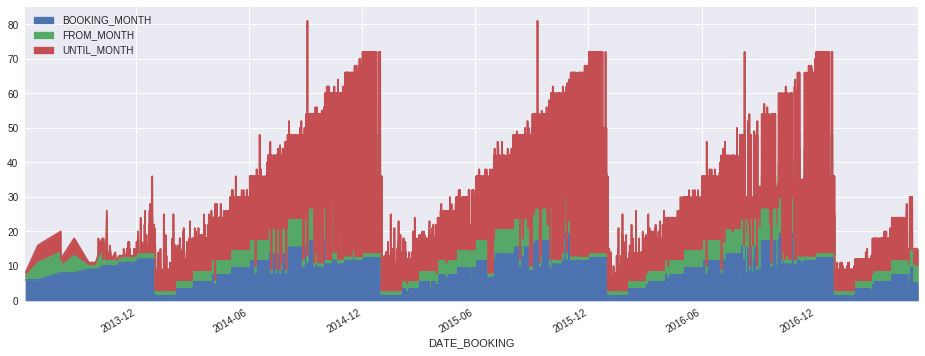

In [84]:
booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [85]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = data.pivot_table(index='BOOKING_YEAR', values=month_list, aggfunc='mean')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
BOOKING_YEAR,,,
2013,11.821628,1.400223,1.412486
2014,6.485077,6.521446,6.513381
2015,6.306367,6.353551,6.347605
2016,6.294093,6.341816,6.332691
2017,2.751472,2.835360,2.843973


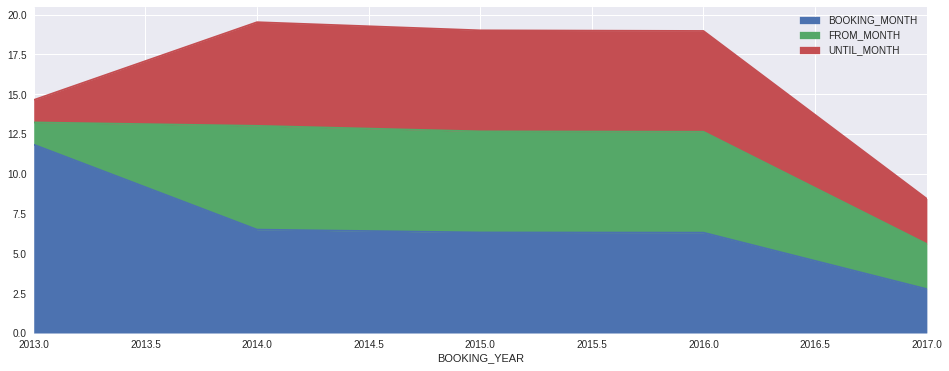

In [86]:
booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [88]:
month_list = ['BOOKING_MONTH','FROM_MONTH','UNTIL_MONTH']
booking_by_month = data.pivot_table(index='BOOKING_HAL_ID', values=month_list, aggfunc='sum')
booking_by_month

,BOOKING_MONTH,FROM_MONTH,UNTIL_MONTH
BOOKING_HAL_ID,,,
17842196,6,1,1
18270895,6,5,5
19054992,8,6,6
19057626,8,2,2
19508250,8,5,5
19923967,9,1,1
19960704,9,1,1
19969142,9,1,1
20102722,9,1,1


In [87]:
#booking_by_month.plot(kind='area', figsize=[16,6], stacked=True)

In [90]:
results = []
for (index, group) in db_data.groupby("CUSTOMER_HAL_ID"):
    #total_time = group["DATE_UNTIL"].max() - group["DATE_FROM"].min()
    usage_time = (group["DATE_UNTIL"] - group["DATE_FROM"]).sum()
    results.append({"CUSTOMER": index, "percentage_used": usage_time})
    
results_df = pd.DataFrame(results)


In [92]:
results_df.head()

,CUSTOMER,percentage_used
0,000157712485827C72C3949FCC2132560E25EBF5,16 days 23:15:00
1,0001A027031ED4A9BC512E9E4534396EEC6B27E4,0 days 05:30:00
2,000264B2CB9F95A6FFF31E0F73CFAA45C546B7A5,0 days 01:30:00
3,0002B0F4032202300C8F107BF407B5BCCABC20A2,2 days 21:30:00
4,0004DDE95618A95691485E31C3D2FFFB4DB3D3E6,0 days 03:30:00


In [93]:
results_df['CUSTOMER'].value_counts().sum()

52669

In [29]:
data.columns

Index(['BOOKING_HAL_ID', 'CATEGORY_HAL_ID', 'VEHICLE_HAL_ID',
       'CUSTOMER_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL',
       'COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE',
       'CITY_RENTAL_ZONE', 'TECHNICAL_INCOME_CHANNEL',
       'VEHICLE_MANUFACTURER_NAME', 'FUEL_TYPE_NAME', 'CATEGORY',
       'BOOKING_YEAR', 'BOOKING_MONTH', 'BOOKING_WDAY', 'FROM_MONTH',
       'UNTIL_MONTH', 'FROM_WDAY', 'UNTIL_WDAY'],
      dtype='object')

In [42]:
data.loc[data['BOOKING_YEAR'] == 2016]

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME,CATEGORY,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
8729,34954533,100012,151056,7BDE53A585598EE748BB7EA8FF3B32629C8191CA,2016-01-01 20:14:37,2016-01-02 13:15:00,2016-01-02 17:15:00,Nein,Nein,26,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,4,1,1,5,5
8730,34963046,100012,151056,7BDE53A585598EE748BB7EA8FF3B32629C8191CA,2016-01-03 10:09:24,2016-01-03 13:00:00,2016-01-03 15:45:00,Nein,Nein,45,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,6,1,1,6,6
8731,34963299,100012,151056,59590107AD53E8B712D2FBA5315947F9AE2021D8,2016-01-03 11:03:08,2016-01-04 09:30:00,2016-01-04 13:15:00,Nein,Nein,39,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,6,1,1,0,0
8732,34965519,100012,151056,A11F8467F564D3BB450865AF1AA7716BE6096F32,2016-01-03 15:57:50,2016-01-03 16:00:00,2016-01-03 16:45:00,Nein,Nein,6,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,6,1,1,6,6
8733,34970193,100012,151056,ED8D70FFD1AEA5880096270B75B80DFA7F591414,2016-01-04 08:57:14,2016-01-04 15:30:00,2016-01-04 19:15:00,Nein,Nein,40,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,0,1,1,0,0
8734,34979265,100012,151056,CB01146E714DF3DFD3C56EB3FF5995BBD38CE028,2016-01-04 20:43:04,2016-01-06 10:00:00,2016-01-06 18:45:00,Nein,Nein,220,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,0,1,1,2,2
8735,34982489,100012,151056,7A3B9D13E381CD29034DDB189B905DBCB0D744FB,2016-01-05 08:43:22,2016-01-05 10:00:00,2016-01-05 11:00:00,Nein,Nein,4,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,1,1,1,1,1
8736,34984593,100012,151056,2E7DDE5C90FB5C67C2937F53AC6BD7DCFAB6BEC6,2016-01-05 11:08:00,2016-01-05 11:15:00,2016-01-05 12:15:00,Nein,Nein,20,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,1,1,1,1,1
8737,34997277,100012,151056,25C84019BE8211D01487D8E99D8A42F316EE2563,2016-01-06 11:55:31,2016-01-07 10:45:00,2016-01-07 17:15:00,Nein,Nein,163,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,2,1,1,3,3
8738,35019358,100012,151056,39FF31DB528FC93F04498168D813A97FC161BC47,2016-01-07 23:54:14,2016-01-08 09:15:00,2016-01-08 14:30:00,Nein,Nein,57,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2016,1,3,1,1,4,4


In [60]:
year = data[(data.BOOKING_YEAR < 2017) & (data.BOOKING_YEAR > 2013)]
year.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,VEHICLE_MANUFACTURER_NAME,FUEL_TYPE_NAME,CATEGORY,BOOKING_YEAR,BOOKING_MONTH,BOOKING_WDAY,FROM_MONTH,UNTIL_MONTH,FROM_WDAY,UNTIL_WDAY
8,21378191,100012,150359,0FC7F06DDDD951AF7009288F8D4B9060925ED107,2014-01-02 17:54:09,2014-01-03 09:00:00,2014-01-03 22:30:00,Nein,Nein,1001,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2014,1,3,1,1,4,4
9,21394268,100012,150359,0646C8373257083080F514A1E7B483BE1020D949,2014-01-04 15:07:28,2014-01-04 16:30:00,2014-01-04 17:30:00,Nein,Nein,2,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2014,1,5,1,1,5,5
10,21395020,100012,150359,BEF6E7452694AB944BA5E2FADFA107C29D6DC111,2014-01-04 16:23:01,2014-01-04 17:45:00,2014-01-04 18:45:00,Nein,Nein,4,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2014,1,5,1,1,5,5
11,21404210,100012,150359,B38DC9BA3EF8BB7717EA1B1EF91FFECC05D60567,2014-01-05 23:02:27,2014-01-05 23:15:00,2014-01-06 00:30:00,Nein,Nein,33,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2014,1,6,1,1,6,0
12,21406248,100012,150359,31A345F78FE6B781182BEFFCA97779712E585472,2014-01-06 09:45:36,2014-01-07 10:00:00,2014-01-07 14:00:00,Nein,Nein,36,...,Citroën,Diesel,Sonderklasse (Alfa MiTo / Citroën DS3),2014,1,0,1,1,1,1


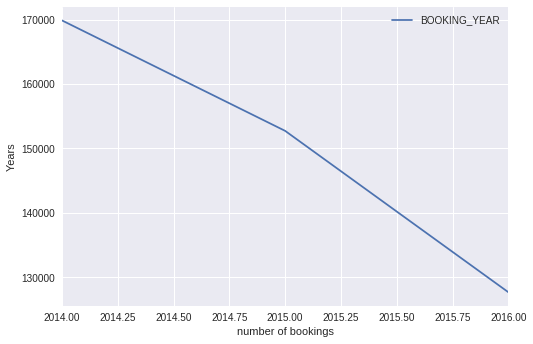

In [61]:
yearb = year.BOOKING_YEAR.value_counts().sort_index().plot(legend=True)
yearb.set_xlabel("number of bookings")
yearb.set_ylabel("Years")

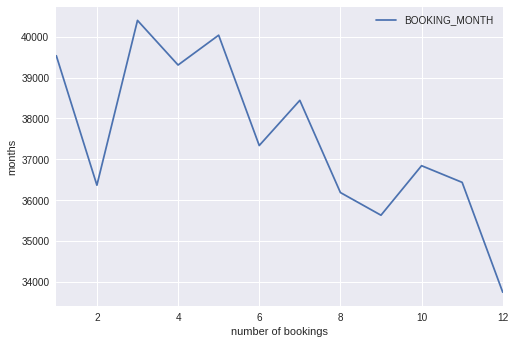

In [62]:
mb = year.BOOKING_MONTH.value_counts().sort_index().plot(legend=True)
mb.set_xlabel("number of bookings")
mb.set_ylabel("months")

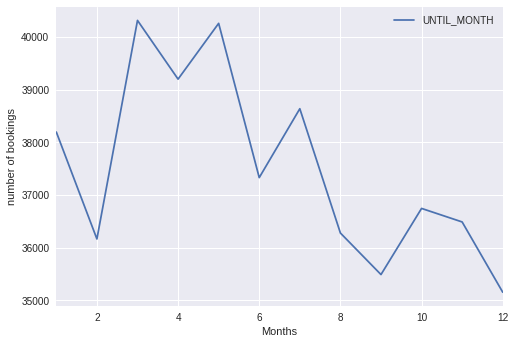

In [63]:
monthE= year.UNTIL_MONTH.value_counts().sort_index().plot(legend=True)
monthE.set_xlabel("Months")
monthE.set_ylabel("number of bookings")

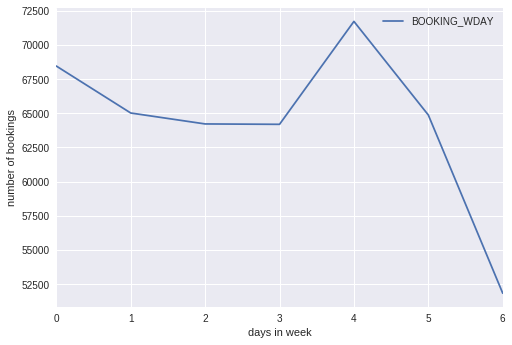

In [66]:
dayB= year.BOOKING_WDAY.value_counts().sort_index().plot(legend=True)
dayB.set_xlabel("days in week")
dayB.set_ylabel("number of bookings")

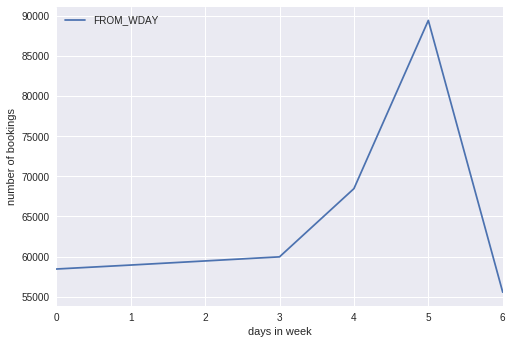

In [67]:
dayS= year.FROM_WDAY.value_counts().sort_index().plot(legend=True)
dayS.set_xlabel("days in week")
dayS.set_ylabel("number of bookings")

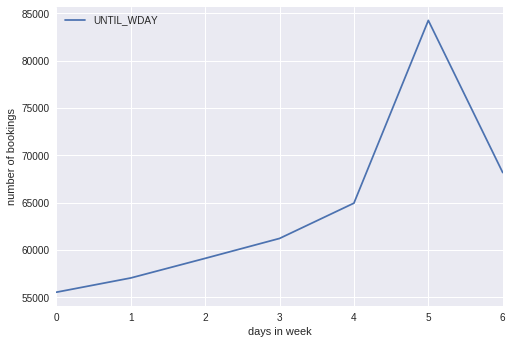

In [68]:
dayE= year.UNTIL_WDAY.value_counts().sort_index().plot(legend=True)
dayE.set_xlabel("days in week")
dayE.set_ylabel("number of bookings")